## Overall Usage Frequency vs Customer Churn

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [4]:
# Define bins and their labels
bins = [1, 3, 9, 12, 15, 18, 21, 24, 27, 30]
labels = ['1-3', '4-9', '10-12', '13-15', '16-18', '19-21', '22-24', '25-27', '28-30']

# Bin the age data
train['Usage_Group'] = pd.cut(train['Overall_Usage_Frequency'], bins=bins, labels=labels, right=False)

In [6]:
from sklearn.preprocessing import OneHotEncoder

# Reshape the Age_Group column to a 2D array
usage_groups = train['Usage_Group'].values.reshape(-1, 1)

encoder = OneHotEncoder(drop='first') 
usage_group_encoded = encoder.fit_transform(usage_groups).toarray()

column_names = encoder.get_feature_names_out(input_features=['Usage_Group'])

usage_group_encoded_df = pd.DataFrame(usage_group_encoded, 
                                    columns=column_names,
                                    index=train.index)

# Concatenate the original DataFrame and the new one-hot encoded DataFrame
train = pd.concat([train, usage_group_encoded_df], axis=1)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Calculate the proportion of churn for each age group
usage_churn_proportion = train.groupby('Usage_Group', observed = True)['Customer_Churn'].value_counts(normalize=True).unstack()

print(usage_churn_proportion)

Customer_Churn         0         1
Usage_Group                       
1-3             0.586420  0.413580
4-9             0.577973  0.422027
10-12           0.560575  0.439425
13-15           0.549515  0.450485
16-18           0.561822  0.438178
19-21           0.596674  0.403326
22-24           0.619772  0.380228
25-27           0.567460  0.432540
28-30           0.614367  0.385633


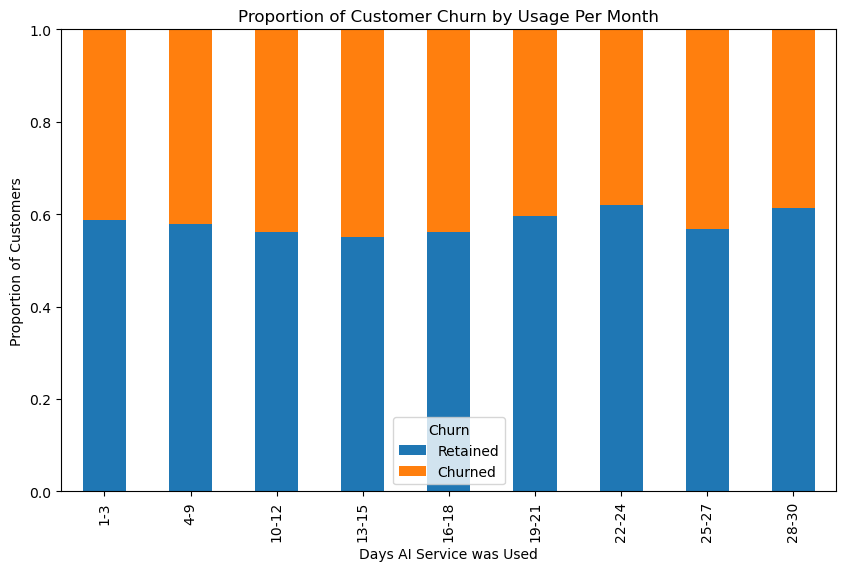

In [16]:
# Plotting
ax = usage_churn_proportion.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Proportion of Customer Churn by Usage Per Month')
plt.xlabel('Days AI Service was Used')
plt.ylabel('Proportion of Customers')
plt.legend(title='Churn', labels=['Retained', 'Churned'])  
plt.ylim([0, 1]) 
plt.show()

# Annotation
for p in ax.patches: 
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    if height > 0:  
        ax.text(x + width/2, 
                y + height/2, 
                '{:.1%}'.format(height),  
                horizontalalignment='center', 
                verticalalignment='center')

plt.show()